<a href="https://colab.research.google.com/github/fred-lafleche/Exchange/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#imports
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plot
from sklearn.utils import resample
from scipy.sparse import coo_matrix
from sklearn.utils import resample
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from numpy import array

In [82]:
heartInput_file = "/content/drive/MyDrive/Colab Notebooks/heart.csv"

heartDataPd = pd.read_csv(heartInput_file)

heartDataPd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Heart Data

In [83]:
heartDataArray = heartDataPd.values
np.random.shuffle(heartDataArray)

print(heartDataArray.size)
heartData = np.delete(heartDataArray, 13, 1)
print(heartData.size)
heartLabel = heartDataArray[:,[13]]
print(heartLabel.size)


4242
3939
303


In [84]:
#Removing features with low variance
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
fsHeartData=sel.fit_transform(heartData)
print(fsHeartData[0])
#removed fbs (fasting blood sugar)

[ 35.   1.   0. 126. 282.   0. 156.   1.   0.   2.   0.   3.]


In [85]:
#Normalization
scaler = preprocessing.StandardScaler().fit(heartData)
scalledHeartData = scaler.transform(heartData)
print(scalledHeartData[0])


#Normalization on feature selected data
scaler = preprocessing.StandardScaler().fit(fsHeartData)
N_F_HeartData = scaler.transform(fsHeartData)
print(N_F_HeartData[0])


[-2.13589054  0.68100522 -0.93851463 -0.3211894   0.69061493 -0.41763453
 -1.00583187  0.27782582  1.43548113 -0.89686172  0.97635214 -0.71442887
  1.12302895]
[-2.13589054  0.68100522 -0.93851463 -0.3211894   0.69061493 -1.00583187
  0.27782582  1.43548113 -0.89686172  0.97635214 -0.71442887  1.12302895]


# Single Decision Tree

In [86]:
m1=0
m2=0
m3=0
m4=0
s1=0
s2=0
s3=0
s4=0
for x in range(10):
  #Normalized and Feature selected data
  NFSDT = tree.DecisionTreeClassifier()
  NFSDTscores = cross_val_score(NFSDT,N_F_HeartData,heartLabel,cv=10)
  m1=m1+NFSDTscores.mean()
  s1 = s1+ (NFSDTscores.std() * 2)

  #Normalized Heart data but with no feature selection
  NSDT = tree.DecisionTreeClassifier()
  NSDTscores = cross_val_score(NSDT,scalledHeartData,heartLabel,cv=10)
  m2=m2+NSDTscores.mean()
  s2 = s2+ (NSDTscores.std() * 2)

  #Feature selected Heart data but non normalized
  FSDT = tree.DecisionTreeClassifier()
  FSDTscores = cross_val_score(FSDT,fsHeartData,heartLabel,cv=10)
  m3=m3+FSDTscores.mean()
  s3 = s3+ (FSDTscores.std() * 2)

  #Heart data but non normalized and no feature selection
  SDT = tree.DecisionTreeClassifier()
  SDTscores = cross_val_score(SDT,heartData,heartLabel,cv=10)
  m4=m4+SDTscores.mean()
  s4 = s4+ (SDTscores.std() * 2)

#tree.plot_tree(SDT)
print("Normalized and Feature Selected Heart Data Accuracy: %0.2f (+/- %0.2f)" % (m1/10, s1/10))
print("Normalized Heart Data Accuracy: %0.2f (+/- %0.2f)" % (m2/10, s2/10))
print("Feature Selected Heart Data Accuracy: %0.2f (+/- %0.2f)" % (m3/10, s3/10))
print("Heart Data Accuracy: %0.2f (+/- %0.2f)" % (m4/10, s4/10))

Normalized and Feature Selected Heart Data Accuracy: 0.79 (+/- 0.12)
Normalized Heart Data Accuracy: 0.79 (+/- 0.12)
Feature Selected Heart Data Accuracy: 0.78 (+/- 0.12)
Heart Data Accuracy: 0.79 (+/- 0.11)


In [95]:
#303 rows, for 10 folds, about 30 rows for testing, rest is training
#Divide data, 80% for training, 20% for testing
#303 rows * 0.8 = 242
training_data=heartData[0:242,0:13]
training_label=heartLabel[0:242]

testing_data=heartData[242:303,0:13]
testing_label=heartLabel[242:303]



Accuracy Score:  0.7377049180327869


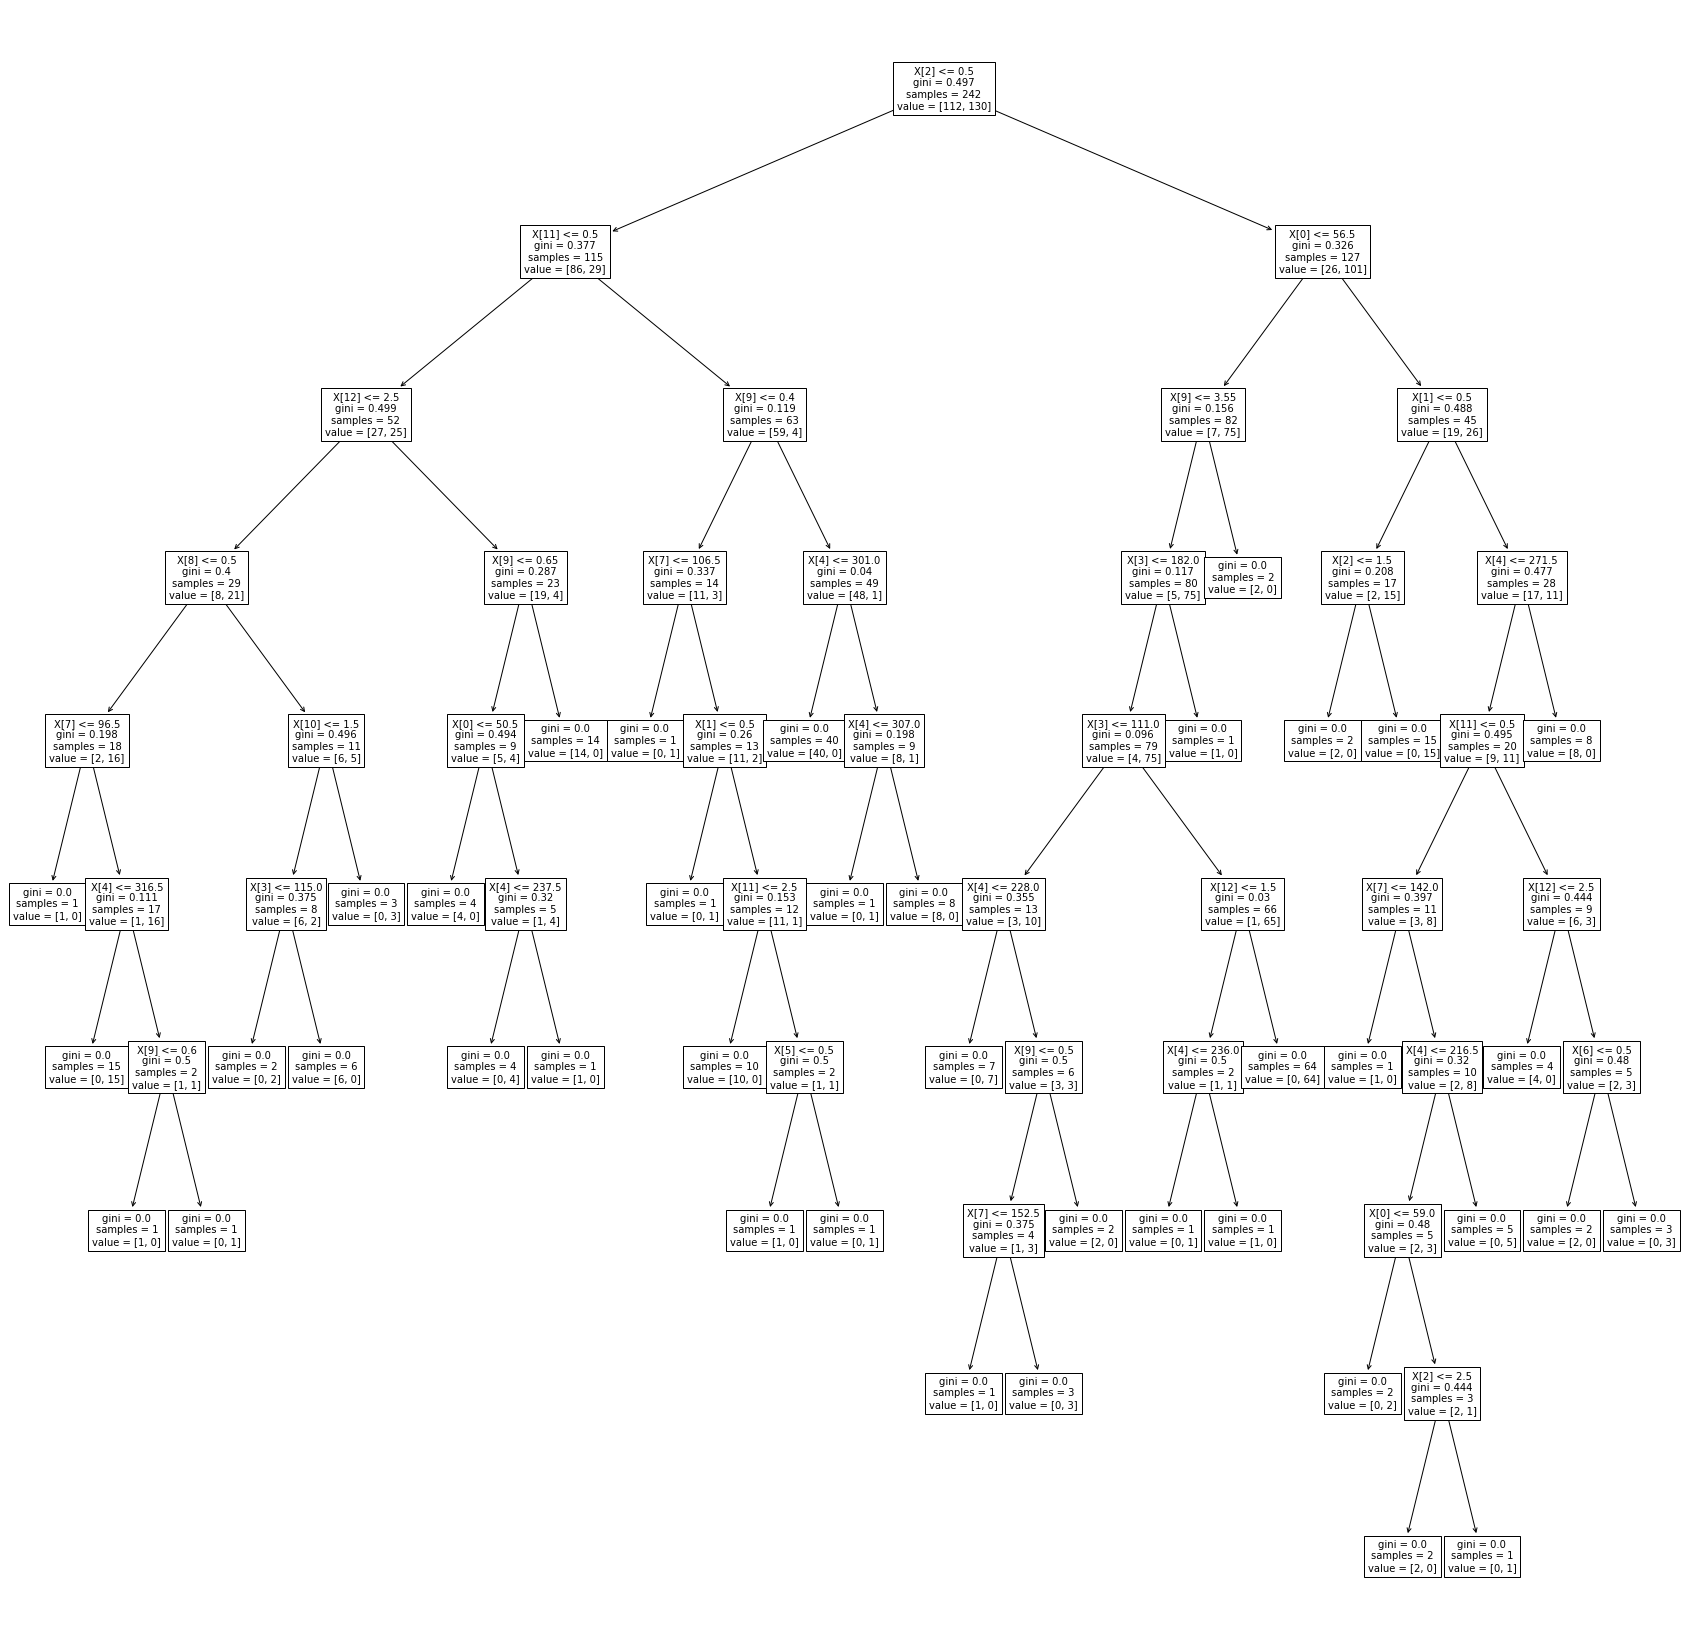

In [104]:
SDT2 = tree.DecisionTreeClassifier()
SDT2 = SDT2.fit(training_data,training_label)
SDT2Pred=SDT2.predict(testing_data)
score = accuracy_score(testing_label, SDT2Pred)
print("Accuracy Score: ",score)

#plotting
plt.figure(figsize=(30,30))  # set plot size (denoted in inches)
tree.plot_tree(SDT2, fontsize=10)
plt.show()